In [146]:
import pandas as pd
from pandas import DataFrame, read_excel, merge
import numpy as np
import matplotlib.pyplot as plt
import rex
from collections import OrderedDict
import seaborn as sns
import matplotlib as mt

In [147]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Ascending_Triangle\\Ascending_Triangle_updated1.csv', encoding="utf-8")

In [148]:
data.head()

,Unnamed: 0,Num,date,pattern,pattern_name,msecurity,colon_count,end_count,end,start,low_x,low_y,upper_x,upper_y,vertical_x,vertical_y
0,0,47,11-04-2019,"[{'end_point': 1483488000000, 'lower_line': [[...",ascending_triangle,85,5,1,1483488000000,1476230400000,"1476230400000, 1479081600000, 1479340800000, ...","66.36252161591491, 68.16448216348886, 68.39952...","1476230400000, 1477872000000, 1480377600000, ...","70.51882561202888, 70.58939607039213, 70.69796...","1476230400000, 1476230400000","66.36252161591491, 70.51882561202888"
1,1,57,11-04-2019,"[{'end_point': 1486512000000, 'lower_line': [[...",ascending_triangle,311,5,1,1486512000000,1480636800000,"1480636800000, 1483056000000, 1486512000000","16.92813395233986, 17.346961379265416, 17.9200...","1480636800000, 1481241600000, 1484697600000, ...","17.753769417774024, 17.772249887764673, 17.864...","1480636800000, 1480636800000","16.92813395233986, 17.753769417774024"
2,2,80,11-04-2019,"[{'end_point': 1488931200000, 'lower_line': [[...",ascending_triangle,197,5,1,1488931200000,1478476800000,"1478476800000, 1480291200000, 1480982400000, ...","25.940001000000017, 26.35860337472285, 26.5380...","1478476800000, 1479686400000, 1482364800000, ...","28.50363681818182, 28.49, 28.459998999999996, ...","1478476800000, 1478476800000","25.940001000000017, 28.50363681818182"
3,4,100,11-04-2019,"[{'end_point': 1505088000000, 'lower_line': [[...",ascending_triangle,302,5,1,1505088000000,1499731200000,"1499731200000, 1502409600000, 1502755200000, ...","49.95170564735737, 52.25849816715608, 52.45908...","1499731200000, 1501113600000, 1503532800000, ...","53.87910062162856, 53.9866273428796, 54.165838...","1499731200000, 1499731200000","49.95170564735737, 53.87910062162856"


In [149]:
data['x']=data['low_x']+","+data['upper_x']+","+data['vertical_x']
data['y']=data['low_y']+","+data['upper_y']+","+data['vertical_y']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x","y"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\Ascending_Triangle\\Ascending_Triangle_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Ascending_Triangle\\Ascending_Triangle_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])

In [150]:
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][0]
data2["first_y"] = data2["y"][0]
data2["first_x"][1:4] = ""
data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x','y'])

In [151]:
newx = data3["first_x"].str.split(",", n =11, expand = True)
newy = data3["first_y"].str.split(",", n =11, expand = True)
data3["x_0"] = newx[0]
data3["x_1"] = newx[1]
data3["x_2"] = newx[2]
data3["x_3"] = newx[3]
data3["x_4"] = newx[4]
data3["x_5"] = newx[5]
data3["x_6"] = newx[6]
data3["x_7"] = newx[7]
data3["x_8"] = newx[8]
data3["x_9"] = newx[9]
data3["xx_1"] = newx[10]
data3["y_0"] = newy[0]
data3["y_1"] = newy[1]
data3["y_2"] = newy[2]
data3["y_3"] = newy[3]
data3["y_4"] = newy[4]
data3["y_5"] = newy[5]
data3["y_6"] = newy[6]
data3["y_7"] = newy[7]
data3["y_8"] = newy[8]
data3["y_9"] = newy[9]
data3["yy_1"] = newy[10]


In [152]:
data3 = data3.melt(id_vars = ["first_x","first_y"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)

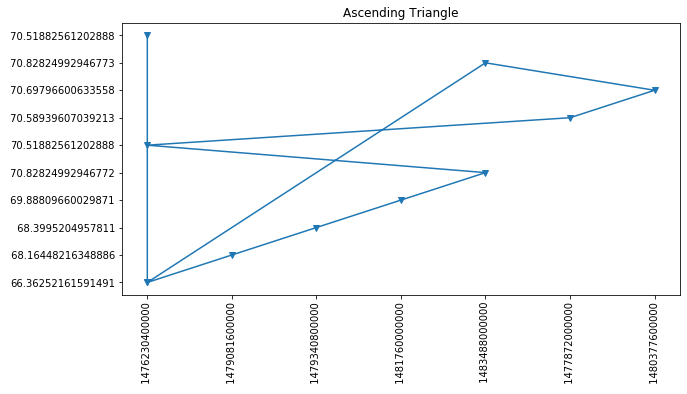

In [155]:
data3["xx"].value_counts()
graph_x = data3['Value'][0:11].tolist()
graph_y = data3['Value'][11:23].tolist()
fig= plt.figure(figsize=(10, 5))
plt.title("Ascending Triangle")
plt.xticks(rotation=90)
plt.plot(graph_x,graph_y,marker='v')
plt.show()

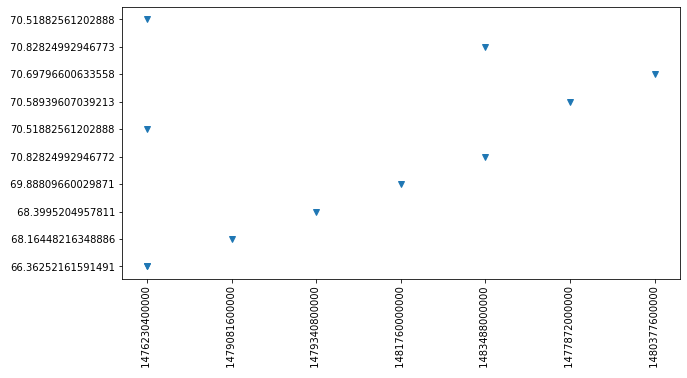

In [156]:
fig= plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.plot(graph_x,graph_y,marker='v',ls="")
plt.show()

In [157]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Ascending_Triangle\\Ascending_Triangle_updated1.csv', encoding="utf-8")

In [158]:
data['x']=data['low_x']+","+data['upper_x']+","+data['vertical_x']
data['y']=data['low_y']+","+data['upper_y']+","+data['vertical_y']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x","y"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\Ascending_Triangle\\Ascending_Triangle_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Ascending_Triangle\\Ascending_Triangle_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])

In [159]:
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][1]
data2["first_y"] = data2["y"][1]
data2["first_x"][1:4] = ""
data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x','y'])
#data3['comma_count'] = data3.first_x.str.count(',')
#data3['comma_count'][0]

In [160]:
newx = data3["first_x"].str.split(",", n =8, expand = True)
newy = data3["first_y"].str.split(",", n =8, expand = True)
data3["x_0"] = newx[0]
data3["x_1"] = newx[1]
data3["x_2"] = newx[2]
data3["x_3"] = newx[3]
data3["x_4"] = newx[4]
data3["x_5"] = newx[5]
data3["x_6"] = newx[6]
data3["x_7"] = newx[7]
data3["x_8"] = newx[8]
data3["y_0"] = newy[0]
data3["y_1"] = newy[1]
data3["y_2"] = newy[2]
data3["y_3"] = newy[3]
data3["y_4"] = newy[4]
data3["y_5"] = newy[5]
data3["y_6"] = newy[6]
data3["y_7"] = newy[7]
data3["y_8"] = newy[8]

In [161]:
data3 = data3.melt(id_vars = ["first_x","first_y"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3

,first_x,first_y,xx,Value
0,"1480636800000, 1483056000000, 1486512000000, ...","16.92813395233986, 17.346961379265416, 17.9200...",x_0,1480636800000
4,"1480636800000, 1483056000000, 1486512000000, ...","16.92813395233986, 17.346961379265416, 17.9200...",x_1,1483056000000
8,"1480636800000, 1483056000000, 1486512000000, ...","16.92813395233986, 17.346961379265416, 17.9200...",x_2,1486512000000
12,"1480636800000, 1483056000000, 1486512000000, ...","16.92813395233986, 17.346961379265416, 17.9200...",x_3,1480636800000
16,"1480636800000, 1483056000000, 1486512000000, ...","16.92813395233986, 17.346961379265416, 17.9200...",x_4,1481241600000
20,"1480636800000, 1483056000000, 1486512000000, ...","16.92813395233986, 17.346961379265416, 17.9200...",x_5,1484697600000
24,"1480636800000, 1483056000000, 1486512000000, ...","16.92813395233986, 17.346961379265416, 17.9200...",x_6,1486512000000
28,"1480636800000, 1483056000000, 1486512000000, ...","16.92813395233986, 17.346961379265416, 17.9200...",x_7,1480636800000
32,"1480636800000, 1483056000000, 1486512000000, ...","16.92813395233986, 17.346961379265416, 17.9200...",x_8,1480636800000
36,"1480636800000, 1483056000000, 1486512000000, ...","16.92813395233986, 17.346961379265416, 17.9200...",y_0,16.92813395233986


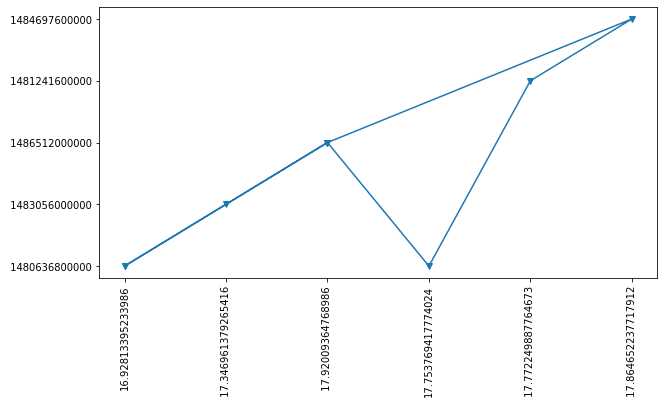

In [162]:
data3["xx"].value_counts()
graph_x = data3['Value'][0:8].tolist()
graph_y = data3['Value'][9:17].tolist()
fig= plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.plot(graph_y,graph_x,marker='v')
plt.show()

In [163]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Ascending_Triangle\\Ascending_Triangle_updated1.csv', encoding="utf-8")
data['x']=data['low_x']+","+data['upper_x']+","+data['vertical_x']
data['y']=data['low_y']+","+data['upper_y']+","+data['vertical_y']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x","y"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\Ascending_Triangle\\Ascending_Triangle_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Ascending_Triangle\\Ascending_Triangle_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][2]
data2["first_y"] = data2["y"][2]
data2["first_x"][1:4] = ""
data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x','y'])
newx = data3["first_x"].str.split(",", n =13, expand = True)
newy = data3["first_y"].str.split(",", n =13, expand = True)
data3["x_0"] = newx[0]
data3["x_1"] = newx[1]
data3["x_2"] = newx[2]
data3["x_3"] = newx[3]
data3["x_4"] = newx[4]
data3["x_5"] = newx[5]
data3["x_6"] = newx[6]
data3["x_7"] = newx[7]
data3["x_8"] = newx[8]
data3["x_9"] = newx[9]
data3["xx_10"] = newx[10]
data3["xx_11"] = newx[11]
data3["xx_12"] = newx[12]
data3["xx_13"] = newx[13]
data3["y_0"] = newy[0]
data3["y_1"] = newy[1]
data3["y_2"] = newy[2]
data3["y_3"] = newy[3]
data3["y_4"] = newy[4]
data3["y_5"] = newy[5]
data3["y_6"] = newy[6]
data3["y_7"] = newy[7]
data3["y_8"] = newy[8]
data3["y_9"] = newy[9]
data3["yy_10"] = newy[10]
data3["yy_11"] = newy[11]
data3["yy_12"] = newy[12]
data3["yy_13"] = newy[13]
data3 = data3.melt(id_vars = ["first_x","first_y"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3
data3.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\test.csv')

In [164]:
data3['comma_count'] = data3.first_x.str.count(',')
data3['comma_count'][0]

13

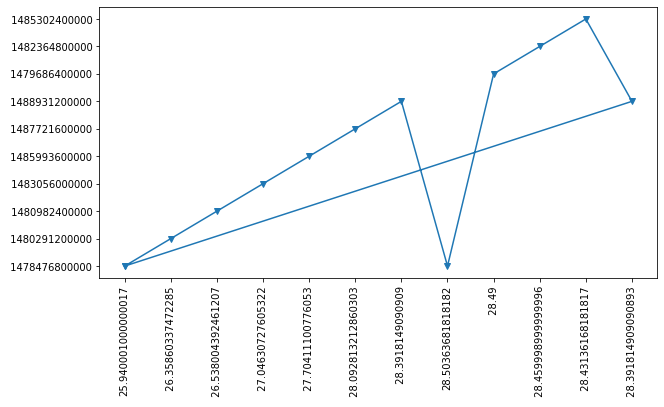

In [165]:
data3["xx"].value_counts()
graph_x = data3['Value'][0:13].tolist()
graph_y = data3['Value'][14:27].tolist()
fig= plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.plot(graph_y,graph_x,marker='v')
plt.show()

In [166]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Ascending_Triangle\\Ascending_Triangle_updated1.csv', encoding="utf-8")
data['x']=data['low_x']+","+data['upper_x']+","+data['vertical_x']
data['y']=data['low_y']+","+data['upper_y']+","+data['vertical_y']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x","y"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\Ascending_Triangle\\Ascending_Triangle_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Ascending_Triangle\\Ascending_Triangle_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][3]
data2["first_y"] = data2["y"][3]
data2["first_x"][1:4] = ""
data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x','y'])
data3['comma_count'] = data3.first_x.str.count(',')
data3['comma_count'][0]

10

In [167]:
newx = data3["first_x"].str.split(",", n =10, expand = True)
newy = data3["first_y"].str.split(",", n =10, expand = True)
data3["x_0"] = newx[0]
data3["x_1"] = newx[1]
data3["x_2"] = newx[2]
data3["x_3"] = newx[3]
data3["x_4"] = newx[4]
data3["x_5"] = newx[5]
data3["x_6"] = newx[6]
data3["x_7"] = newx[7]
data3["x_8"] = newx[8]
data3["x_9"] = newx[9]
data3["xx_10"] = newx[10]
#data3["x_11"] = newx[11]
#data3["x_12"] = newx[12]
#data3["x_13"] = newx[13]
data3["y_0"] = newy[0]
data3["y_1"] = newy[1]
data3["y_2"] = newy[2]
data3["y_3"] = newy[3]
data3["y_4"] = newy[4]
data3["y_5"] = newy[5]
data3["y_6"] = newy[6]
data3["y_7"] = newy[7]
data3["y_8"] = newy[8]
data3["y_9"] = newy[9]
data3["yy_10"] = newy[10]
#data3["y_11"] = newy[11]
#data3["y_12"] = newy[12]
#data3["y_13"] = newy[13]
data3 = data3.melt(id_vars = ["first_x","first_y"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3

,first_x,first_y,xx,Value
0,"1499731200000, 1502409600000, 1502755200000, ...","49.95170564735737, 52.25849816715608, 52.45908...",comma_count,10
1,,,comma_count,0
2,,,comma_count,0
3,,,comma_count,0
4,"1499731200000, 1502409600000, 1502755200000, ...","49.95170564735737, 52.25849816715608, 52.45908...",x_0,1499731200000
8,"1499731200000, 1502409600000, 1502755200000, ...","49.95170564735737, 52.25849816715608, 52.45908...",x_1,1502409600000
12,"1499731200000, 1502409600000, 1502755200000, ...","49.95170564735737, 52.25849816715608, 52.45908...",x_2,1502755200000
16,"1499731200000, 1502409600000, 1502755200000, ...","49.95170564735737, 52.25849816715608, 52.45908...",x_3,1504051200000
20,"1499731200000, 1502409600000, 1502755200000, ...","49.95170564735737, 52.25849816715608, 52.45908...",x_4,1505088000000
24,"1499731200000, 1502409600000, 1502755200000, ...","49.95170564735737, 52.25849816715608, 52.45908...",x_5,1499731200000


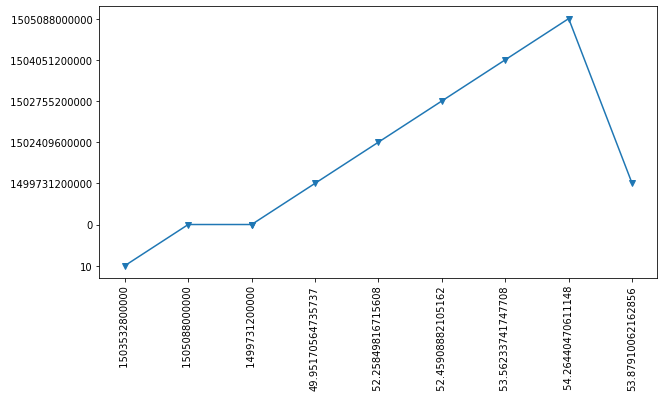

In [168]:
data3["xx"].value_counts()
graph_x = data3['Value'][0:10].tolist()
graph_y = data3['Value'][11:21].tolist()
fig= plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.plot(graph_y,graph_x,marker='v')
plt.show()